In [1]:
import networkx as nx
import numpy as np
import util
from ado import ApproximateDistanceOracle
import matplotlib.pyplot as plt

4it [00:00, 38.62it/s]

5


6it [00:00,  9.64it/s]
100%|██████████| 30/30 [00:00<00:00, 39333.89it/s]


In [2]:
G = nx.fast_gnp_random_graph(2000, 0.3)
ado_exact = ApproximateDistanceOracle(G, 1)
ado_approx_2 = ApproximateDistanceOracle(G, 2)
ado_approx_3 = ApproximateDistanceOracle(G, 3)
ado_approx_4 = ApproximateDistanceOracle(G, 4)
ado_approx_10 = ApproximateDistanceOracle(G, 10)

In [3]:
ado_approx_10.preprocess()
print("done - ado_approx_10")
ado_approx_4.preprocess()
print("done - ado_approx_4")
ado_approx_3.preprocess()
print("done - ado_approx_3")
ado_approx_2.preprocess()
print("done - ado_approx_2")
ado_exact.preprocess()
print("done - ado_exact")

0it [00:00, ?it/s]

10


6it [00:25,  5.29s/it]

KeyboardInterrupt: 

In [9]:
r1, r2, r3, r4, r10 = [], [], [], [], []

for i in range(30):
    u = np.random.randint(0, len(G.nodes())-1)
    v = np.random.randint(0, len(G.nodes())-1)
    r1.append(ado_exact.query(u, v))
    r2.append(ado_approx_3.query(u, v))
    r3.append(ado_approx_4.query(u, v))
    r4.append(ado_approx_2.query(u, v))
    r10.append(ado_approx_10.query(u, v))

In [10]:
e2 = [r2[i]/r1[i] for i in range(len(r1)) if r1[i] != 0]
e3 = [r3[i]/r1[i] for i in range(len(r1)) if r1[i] != 0]
e4 = [r4[i]/r1[i] for i in range(len(r1)) if r1[i] != 0]
e10 = [r10[i]/r1[i] for i in range(len(r1)) if r1[i] != 0]

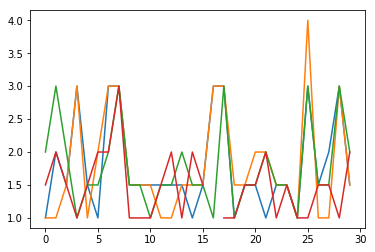

In [11]:
plt.figure(1)
plt.plot(e2)
plt.plot(e3)
plt.plot(e4)
plt.plot(e10)
plt.show()

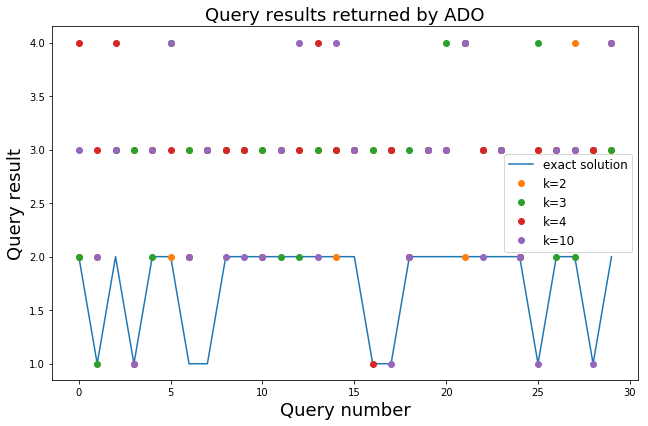

In [12]:
fig = plt.figure(1)
plt.plot(r1, label="exact solution")
plt.plot(r2, "o", label="k=2")
plt.plot(r3, "o", label="k=3")
plt.plot(r4, "o", label="k=4")
plt.plot(r10, "o", label="k=10")
plt.legend( fontsize=12)
plt.xlabel("Query number", fontsize=18)
plt.ylabel("Query result",  fontsize=18)
plt.title("Query results returned by ADO",  fontsize=18)
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)
plt.show()
fig.savefig("../figs/ADO_acc.pdf")

In [20]:
G = nx.cycle_graph(4)
for (u, v) in G.edges():
    G.edges[u,v]['weight'] =  np.random.randint(1,10)

{(0, 1): Text(-0.6697981187674618, -0.2067763692627097, '5'),
 (0, 3): Text(-0.1167211313921856, 0.5966862601924436, '1'),
 (1, 2): Text(0.11672113139218565, -0.596686260192443, '9'),
 (2, 3): Text(0.6697981187674619, 0.20677636926271042, '2')}

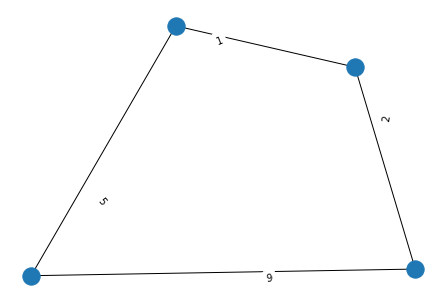

In [21]:
labels = nx.get_edge_attributes(G,'weight')
nx.draw(G, nx.spring_layout(G))
nx.draw_networkx_edge_labels(G,nx.spring_layout(G),edge_labels=labels)

In [22]:
d = {1: 10, 2: 5, 3: 10, 4:7}

In [23]:
util.modifiedDijkstra(G, 1, d)

({1: 0, 0: 5, 2: 9, 3: 6}, {0: (1, ()), 2: (1, ()), 3: (0, (1, ()))})